In [1]:
pwd

'C:\\Users\\shubh\\OneDrive\\Documents\\DS Web apps\\Untitled Folder'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\shubh\OneDrive\Documents\Udemy ML course\My Datasets\StudentDropOut.csv")

In [4]:
df.head()

,Residence_city,Socioeconomic_level,Civil_status,Age,State,Province,Vulnerable_group,Desired_program,Family_income,Father_level,Mother_level,STEM_subjects,H_subjects,Dropout
0,LOCAL,2,Single,23,LOCAL,LOCAL,2,UNSPECIFIED,650000,HIGH SCHOOL,HIGH SCHOOL,57.5,38.0,NO
1,LOCAL,2,Single,23,LOCAL,LOCAL,2,UNSPECIFIED,3800000,TECHNICAL,UNDERGRADUATE,51.0,50.0,YES
2,LOCAL,3,Single,27,LOCAL,LOCAL,2,UNSPECIFIED,2500000,UNDERGRADUATE,HIGH SCHOOL,48.3,43.5,YES
3,LOCAL,1,Single,24,NEIGHBOR,FOREIGN,2,UNSPECIFIED,1900000,HIGH SCHOOL,TECHNICAL,35.8,49.3,YES
4,NEIGHBOR,1,Single,26,NEIGHBOR,FOREIGN,2,UNSPECIFIED,500000,HIGH SCHOOL,HIGH SCHOOL,42.7,41.1,YES


In [5]:
df.shape

(219, 14)

In [6]:
df.describe()

,Socioeconomic_level,Age,Vulnerable_group,Family_income,STEM_subjects,H_subjects
count,219.000000,219.000000,219.000000,2.190000e+02,219.000000,219.000000
mean,2.164384,26.812785,1.908676,1.962812e+06,49.205479,45.574886
std,0.972281,3.853584,0.470084,2.400445e+06,6.834852,6.864104
min,1.000000,21.000000,-1.000000,0.000000e+00,20.000000,20.000000
25%,1.000000,24.000000,2.000000,7.500000e+05,45.300000,41.300000
50%,2.000000,26.000000,2.000000,1.600000e+06,48.800000,45.300000
75%,3.000000,28.000000,2.000000,2.500000e+06,53.050000,50.300000
max,5.000000,48.000000,2.000000,2.800000e+07,67.600000,66.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Residence_city       219 non-null    object 
 1   Socioeconomic_level  219 non-null    int64  
 2   Civil_status         219 non-null    object 
 3   Age                  219 non-null    int64  
 4   State                219 non-null    object 
 5   Province             219 non-null    object 
 6   Vulnerable_group     219 non-null    int64  
 7   Desired_program      219 non-null    object 
 8   Family_income        219 non-null    int64  
 9   Father_level         219 non-null    object 
 10  Mother_level         219 non-null    object 
 11  STEM_subjects        219 non-null    float64
 12  H_subjects           219 non-null    float64
 13  Dropout              219 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 24.1+ KB


<AxesSubplot:xlabel='Province', ylabel='count'>

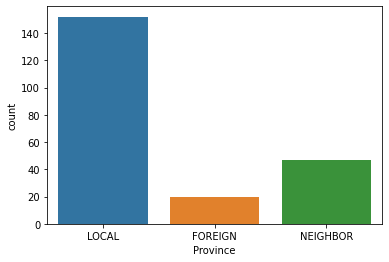

In [8]:
sns.countplot(x="Province", data=df)

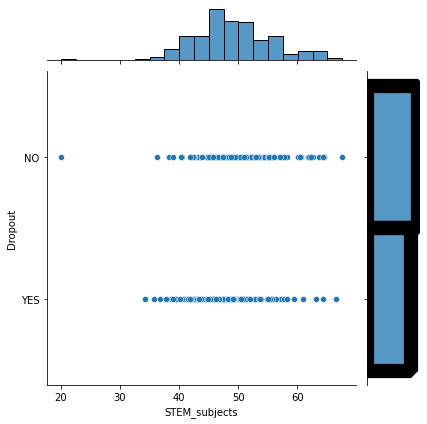

In [9]:
sns.jointplot(x="STEM_subjects", y="Dropout", data=df)

In [25]:
del df["Civil_status"]

In [26]:
df.head()

,Residence_city,Socioeconomic_level,Age,Province,Family_income,Father_level,Mother_level,STEM_subjects,H_subjects,Dropout
0,1,2,23,1,650000,2,2,57.5,38.0,0
1,1,2,23,1,3800000,4,3,51.0,50.0,1
2,1,3,27,1,2500000,3,2,48.3,43.5,1
3,1,1,24,3,1900000,2,4,35.8,49.3,1
4,2,1,26,3,500000,2,2,42.7,41.1,1


In [27]:
df["Mother_level"].value_counts()

2    69
3    63
1    46
4    35
5     5
6     1
Name: Mother_level, dtype: int64

In [28]:
cleanup_nums = {
                "Residence_city":{"LOCAL":1, "NEIGHBOR":2, "FOREIGN":3},
                "Province":{"LOCAL":1, "NEIGHBOR":2, "FOREIGN":3},
                "Father_level" : {"PRIMARY SCHOOL":1, "HIGH SCHOOL":2, "UNDERGRADUATE":3, "TECHNICAL":4, "TECHNOLOGIST":5, "UNREGISTERED":6 },
                "Mother_level" : {"PRIMARY SCHOOL":1, "HIGH SCHOOL":2, "UNDERGRADUATE":3, "TECHNICAL":4, "TECHNOLOGIST":5, "UNREGISTERED":6 },
                "Dropout" : {"YES":1, "NO":0}
}

In [29]:
df = df.replace(cleanup_nums)

In [31]:
df.head()

,Residence_city,Socioeconomic_level,Age,Province,Family_income,Father_level,Mother_level,STEM_subjects,H_subjects,Dropout
0,1,2,23,1,650000,2,2,57.5,38.0,0
1,1,2,23,1,3800000,4,3,51.0,50.0,1
2,1,3,27,1,2500000,3,2,48.3,43.5,1
3,1,1,24,3,1900000,2,4,35.8,49.3,1
4,2,1,26,3,500000,2,2,42.7,41.1,1


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X=df.loc[:,df.columns != "Dropout"]

In [36]:
y = df["Dropout"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
#acc_score = metrics.accuracy_score(y_test, predicted_values)
#acc_score.append(acc_score)
#model.append('Decision Tree')
#print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.40      0.32      0.35        19
           1       0.55      0.64      0.59        25

    accuracy                           0.50        44
   macro avg       0.48      0.48      0.47        44
weighted avg       0.49      0.50      0.49        44



In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [40]:
confusion_matrix(y_test, DecisionTree.predict(X_test))

array([[ 6, 13],
       [ 9, 16]], dtype=int64)

In [41]:
accuracy_score(y_test, DecisionTree.predict(X_test))

0.5

In [42]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()


## Gaussian Naive Baye

In [43]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
#x = metrics.accuracy_score(y_test, predicted_values)
#acc.append(x)
#model.append('Naive Bayes')
#print("Naive Bayes's Accuracy is: ", x)

#print(classification_report(Ytest,predicted_values))

In [44]:
confusion_matrix(y_test, NaiveBayes.predict(X_test))

array([[ 3, 16],
       [ 4, 21]], dtype=int64)

In [45]:
accuracy_score(y_test, NaiveBayes.predict(X_test))

0.5454545454545454

## SVM

In [46]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(X_train,y_train)

predicted_values = SVM.predict(X_test)

#x = metrics.accuracy_score(Ytest, predicted_values)
#acc.append(x)
#model.append('SVM')
#print("SVM's Accuracy is: ", x)

#print(classification_report(Ytest,predicted_values))

In [47]:
confusion_matrix(y_test, SVM.predict(X_test))

array([[18,  1],
       [22,  3]], dtype=int64)

In [48]:
accuracy_score(y_test, SVM.predict(X_test))

0.4772727272727273

  ## Logistic Regression
 

In [49]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)

#x = metrics.accuracy_score(Ytest, predicted_values)
#acc.append(x)
#model.append('Logistic Regression')
#print("Logistic Regression's Accuracy is: ", x)

#print(classification_report(Ytest,predicted_values))

In [50]:
confusion_matrix(y_test,LogReg.predict(X_test))
accuracy_score(y_test, LogReg.predict(X_test))

0.4318181818181818

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=25, random_state=0, n_jobs=-1)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

#x = metrics.accuracy_score(Ytest, predicted_values)
#acc.append(x)
#model.append('RF')
#print("RF's Accuracy is: ", x)

#print(classification_report(Ytest,predicted_values))

In [52]:
confusion_matrix(y_test,RF.predict(X_test))
accuracy_score(y_test, RF.predict(X_test))

0.5227272727272727

In [53]:
 from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {"max_features":[1,2,3,4,5,6,7,8,9], 'min_samples_split':[2,3,13, 15]}

In [58]:
grid_search = GridSearchCV(RF, param_grid, n_jobs=-1, cv=5, scoring="accuracy")

In [59]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=25, n_jobs=-1,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 13, 15]},
             scoring='accuracy')

In [60]:
grid_search.best_params_

{'max_features': 1, 'min_samples_split': 13}

In [61]:
cvrf_clf =  grid_search.best_estimator_

In [62]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[16,  3],
       [15, 10]], dtype=int64)

In [73]:
accuracy_score(y_test
              , cvrf_clf.predict(X_test))

0.5909090909090909

In [74]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## XGBoost

In [65]:
xgb_clf = xgb.XGBClassifier(n_estimator = 500, learning_rate = 0.1, random_state=42)

In [67]:
param_test1= {
    'max_depth':range(3,10,2),
    'gamma': [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree': [0.8,0.9],
    'reg_alpha': [1e-2, 0.1, 1]
}

In [69]:
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs=-1, cv=5, scoring='accuracy')

In [70]:
grid_search.fit(X_train, y_train)

[18:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimator=500, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tre

In [71]:
cvxg_clf = grid_search.best_estimator_

In [72]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.5909090909090909